## 17. 차원 축소

### import

In [2]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [np, pd, mpl, sns, sklearn]:
    print(i.__name__, i.__version__)

numpy 2.1.3
pandas 2.2.3
matplotlib 3.8.4
seaborn 0.13.2
sklearn 1.5.2


### 예제 데이터셋 준비

In [3]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
df_spam = pd.read_csv('data/SMSSpamCollection.tsv', sep='\t')
df_spam.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 1. 차원 축소(Dimension Reduction)

#### 데이터의 정보량과 구조적 특성을 최대한 보존하며 더 낮은 차원 공간으로 변환하는 과정

- 목적
1. 차원의 저주(Curse of Dimensionality)완화를 통한 성능 향상
2. 노이즈 제거
3. 계산 효율성 증가
4. 시각화

### 2. 주성분 분석(PCA)

#### 주성분 분석(Principal Component Analysis, PCA)
- 관점: 분산은 하나의 변수가 설명하는 정보량
$\Rightarrow$ 공분산: 두 변수가 공통으로 지닌 정보량
- 변수 간 공분산이 0 이 되도록 하는 선형 변환 유도
$\Rightarrow$ 공분산이 0: 두 변수 간에 중복되는 정보가 없음을 의미
- 성분(Component): 원래 변수를 선형 변환함으로써 만들어진 새로운 축
$\Rightarrow$ 성분의 분산: 성분이 설명하는 정보량
- 각 성분의 분산의 합과 원래 변수의 분산의 합이 같도록 유도
$\Rightarrow$ 원래 데이터와 변환의 데이터가 나타내는 정보량 동일



#### 주성분 분석 유도 과정 I


$
X = \begin{bmatrix}
x_{11} & \cdots & x_{1m} \\
\vdots & \ddots & \vdots \\
x_{n1} & \cdots & x_{nm}
\end{bmatrix}
$

- 데이터 행렬을 중심 평균화함
- 각 열에 입의의 스칼라해도 정보량(분산)은 변하지 않음

$
\mathbf{x}_i' = \begin{bmatrix}
x_{1i} - \bar{\mathbf{x}}_i \\
\vdots \\
x_{ni} - \bar{\mathbf{x}}_i
\end{bmatrix}
\qquad
X_c = [\mathbf{x}_1' \quad \cdots \quad \mathbf{x}_m']
$

$
Cov(X) = Cov(X_c) = \frac{1}{n-1} \begin{bmatrix}
\langle \mathbf{x}_1', \mathbf{x}_1' \rangle & \cdots & \langle \mathbf{x}_1', \mathbf{x}_m' \rangle \\
\vdots & \ddots & \vdots \\
\langle \mathbf{x}_m', \mathbf{x}_1' \rangle & \cdots & \langle \mathbf{x}_m', \mathbf{x}_m' \rangle
\end{bmatrix} = \frac{X_c^T X_c}{n-1}
$

$
Cov(X_c) = \frac{X_c^T X_c}{n-1} = A
$

$
Z = X_c W
$

W로 선형 변환한 데이터 행렬 Z의 각 열의 평균: 0

$
Cov(Z) = \frac{(X_c W)^T (X_c W)}{n-1} = \frac{W^T X_c^T X_c W}{n-1} = W^T A W
$

아래 식을 만족시키는 W 찾기

$
Cov(Z) = W^T A W = \begin{bmatrix}
\lambda_1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \lambda_m
\end{bmatrix}
$

$Cov(Z) = W^T A W = \begin{bmatrix}
\lambda_1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \lambda_m
\end{bmatrix}$

$\Lambda = \begin{bmatrix}
\lambda_1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & \lambda_m
\end{bmatrix}$

$W^T A W = \Lambda$

$A = (W^T)^{-1} \Lambda W^{-1}$

$A^T = (W \Lambda W^{-1})^T$

$A^T = W^{-1^T} \Lambda^T W^T$

$\Lambda = \Lambda^T$ $A = A^T$

$W \Lambda W^{-1} = W^{-1^T} \Lambda W^T$

$W^T = W^{-1}$ $\Rightarrow$ 정규직교(Orthonormal)

$W^{-1} A W = \Lambda$

$AW = W\Lambda$

주성분 변환은 공분산행렬의 고유값 분해

trace(행렬 대각요소의 합) 순환 법칙

$trace(AB) = trace(BA)$

$trace(W^{-1}AW) = trace(AWW^{-1})$

$trace(\Lambda) = trace(A)$

각 성분의 분산의 합과 원래 변수의 분산의 합이 같음

#### 주성분 분석의 효과

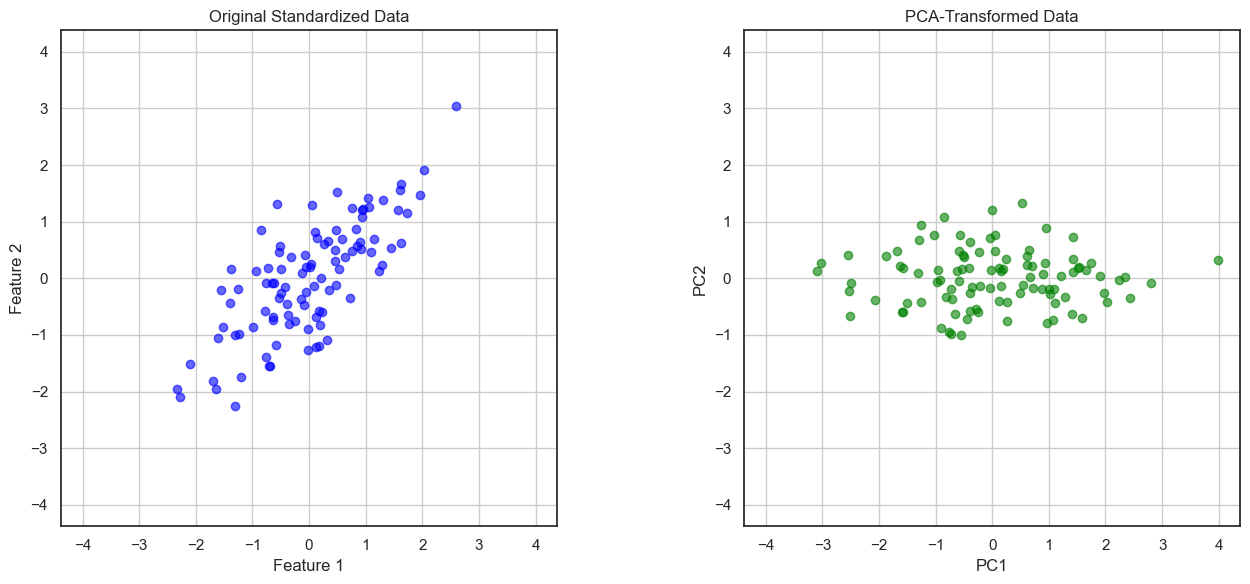


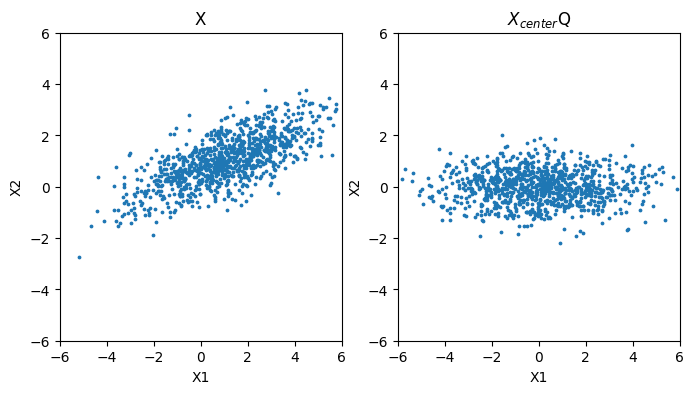

In [5]:
from scipy.stats import multivariate_normal
from numpy.linalg import eigh
def set_ax(ax, title):
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# 평균이 모두 1이고 공분산 행렬 cov를 따르는 다변량 정규분포의 표본을 뽑습니다.
cov = np.array([[4, 2 ** 0.5], [2 ** 0.5, 1]])
X = multivariate_normal.rvs(mean=[1, 1], cov=cov, size=1000)
# mean centering을 합니다.
X_center = X - X.mean(axis=0)
# A 공분산 행렬을 구합니다.
A = np.dot(X_center.T, X_center) / (X_center.shape[0] - 1)
# A를 고윳값 분해 합니다.
Lambda, Q = eigh(A)
# 큰 고윳값을 우선으로 Lambda, Q를 정렬합니다.
# Lambda의 내림차순으로 인덱스를 정렬합니다.
idx = np.argsort(-Lambda)
# 이에 따라, Lambda와 Q도 이에 따라 재배치 합니다.
Lambda, Q = Lambda[idx], Q[:, idx]

axes = axes.ravel()
axes[0].scatter(X[:, 0], X[:, 1], s=3)
set_ax(axes[0], 'X')

XQ = np.dot(X_center, Q)
axes[1].scatter(XQ[:, 0], XQ[:, 1], s=3)
set_ax(axes[1], '$X_{center}$Q')
plt.show()

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry에서 'fruitset', 'fruitmass', 'seeds' 변수를 평준 정규화한 행렬을 **X_mc**라고 정의합니다.
          
**X_mc**을 가지고 공분산 행렬을 구하고, 이를 고윳값 분해하여 고윳값과 이에 해당하는 고유 벡터들을 구합니다.

고유 벡터를 모아 행렬을 만들고 주성분 분산을 위한 데이터를 만듭니다.

</div>

In [6]:
from scipy.stats import zscore
# mean centering을 합니다.
X_cols = ['fruitset', 'fruitmass', 'seeds']
# 표준화를 수행합니다. 표준화를 하면 평균이 0이 되므로 따로 mean centering은 하지 않습니다.
X_mc = zscore(df_berry[X_cols], ddof=1)
Lambda, Q = eigh(X_mc.T.dot(X_mc) / (len(X_mc) - 1))
idx = np.argsort(-Lambda)
Lambda, Q = Lambda[idx], Q[:, idx]
X_pca = np.dot(X_mc, Q)

In [7]:
Lambda, Lambda / np.sum(Lambda)

(array([2.93754525, 0.05616667, 0.00628807]),
 array([0.97918175, 0.01872222, 0.00209602]))

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_mc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([2.93754525, 0.05616667, 0.00628807]),
 array([0.97918175, 0.01872222, 0.00209602]))

In [19]:
X_comp = ['comp_{}'.format(i) for i in range(1,4)]
df_emat = pd.DataFrame(
    pca.components_, index = X_comp, columns = X_cols
)
df_emat

,fruitset,fruitmass,seeds
comp_1,-0.572832,-0.577784,-0.581402
comp_2,0.799192,-0.551268,-0.239574
comp_3,0.182086,0.601888,-0.777544


첫 번째 주성분은 전체 분산의 약 98%를 설명하고 있고, 첫번째 주성분에 대한 변수의 영향도는 seeds > fruitmass > fruitset 의 순으로 높습니다.

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**X_mc**를 주성분 분석을 통해 얻을 수 있는 성분들을 분산 설명력이 높은 성분 우선으로 

1 ~ 3개 까지 성분을 선택하면서, 역변환을 합니다. 이들이 지닌 분산과 원래의 분산의 비율을 계산해봅니다.

</div>

In [20]:
for i in range(1, 4):
    X_pca_sel = X_pca[:, :i]
    X_inv = np.dot(X_pca[:, :i], Q.T[:i])
    print(i, np.square(X_inv - X_mc).mean() / X_mc.var(), 1 - np.sum(Lambda[:i]) / np.sum(Lambda))

1 0.020818249315840885 0.020818249315841086
2 0.002096024539033975 0.0020960245390341248
3 5.707759516135403e-32 0.0


**[Ex. 3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**X_mc**를 주성분 분석을 통해 얻을 수 있는 성분들을 분산 설명력이 높은 성분 우선으로 

1 ~ 3개 까지 성분을 선택하면서, 역변환을 합니다. 이들이 지닌 분산과 원래의 분산의 비율을 계산해봅니다.

이 과정을 sklearn.decomposition.PCA를 사용하여 해봅니다.

</div>

In [21]:
for i in range(1, 4):
    pca = PCA(n_components=i).fit(X_mc)
    X_pca = pca.transform(X_mc)
    X_inv = pca.inverse_transform(X_pca)
    print(i, np.square(X_inv - X_mc).mean() / X_mc.var(), 1.0 - np.square(X_inv - X_mc).mean() / X_mc.var())
print(pca.explained_variance_ratio_)    

1 0.020818249315840885 0.9791817506841591
2 0.0020960245390339756 0.997903975460966
3 5.772543545450385e-31 1.0
[0.97918175 0.01872222 0.00209602]


### 3. 특이값 분해

#### 특이값 분해(Singular Value Decomposition): m×n 행렬 M 을 3 개의 행렬 의 곱으로 분해

$
\mathbf{𝑀}=\mathbf{𝑈}\mathbf{\Sigma}\mathbf{V}^𝑇
$

- $\mathbf{𝑉}$: 우측 특이 행렬
- $\mathbf{𝑈}$: 좌측 특이 행렬
> 대각 요소는 음수가 아니고, 나머지는 모두 0 인 행렬
- $\mathbf{\Sigma}$: 특이값 행렬

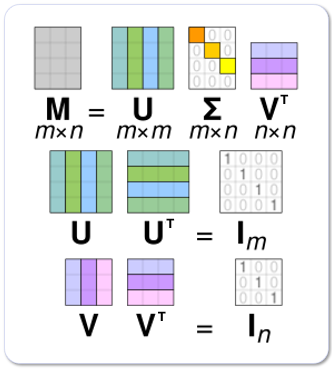
- 출처: https://en.wikipedia.org/wiki/Singular_value_decomposition


#### 𝑈,𝑉는 정규 직교(Orthonormal) 행렬

$MM^T = U\Sigma V^T V\Sigma^T U^T$

$U$는 $MM^T$의 고유벡터로 구성

$U^{-1} = U^T$ $UU^{-1} = I$

$MM^T = U\Sigma\Sigma^T U^T$

$M^T M = V\Sigma^T U^T U\Sigma V^T$

$M^T M = V\Sigma^T \Sigma V^T$

$V$는 $MM^T$의 고유벡터로 구성

$V^{-1} = V^T$ $VV^{-1} = I$

#### 주성분 분석(Principal Component Analysis) 유도

$X_c = X - \bar{X}$ $X$중심 평균화

공분산행렬의 고유값 분해

$\frac{X_c^T X_c}{n-1} = V\Lambda V^T$

$X_c = U\Sigma V^T$

$X_c^T X_c = V\Sigma^T U^T U\Sigma V^T = V\Sigma^T \Sigma V^T$

$\frac{X_c^T X_c}{n-1} = V\frac{\Sigma^T \Sigma}{n-1} V^T$ $\Lambda = \frac{\Sigma^T \Sigma}{n-1}$

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
**X_mc**를 특이값 분해를 합니다. **X_mc**를 주성분 분석한 결과와 비교해봅니다.
    
</div>

In [22]:
from numpy.linalg import svd
U, Sigma, VT = svd(X_mc)
U, Sigma, VT

(array([[-0.03752262,  0.02423427, -0.00683731, ..., -0.04252111,
         -0.0439883 , -0.0516902 ],
        [-0.02233289,  0.02352201, -0.01621438, ..., -0.00726919,
         -0.00659548, -0.00808053],
        [-0.04742664,  0.03717746, -0.00931511, ..., -0.03362016,
         -0.03220682, -0.03094332],
        ...,
        [-0.04296971,  0.01228147, -0.0315652 , ...,  0.99718923,
         -0.00282258, -0.00310419],
        [-0.04441712,  0.01200587, -0.03000578, ..., -0.00281749,
          0.99716608, -0.00312736],
        [-0.0515936 ,  0.01498318, -0.02841987, ..., -0.00308425,
         -0.00311302,  0.99653263]]),
 array([47.74447733,  6.60191936,  2.20896925]),
 array([[ 0.57283248,  0.5777839 ,  0.58140237],
        [-0.79919179,  0.55126813,  0.23957448],
        [-0.18208632, -0.60188804,  0.77754444]]))

In [23]:
Lambda, Q = eigh(np.cov(X_mc.T))
idx = np.argsort(-Lambda)
Lambda, Q = Lambda[idx], Q[:, idx]
Lambda, Sigma ** 2 / (X_mc.shape[0] - 1), Q, VT.T

(array([2.93754525, 0.05616667, 0.00628807]),
 array([2.93754525, 0.05616667, 0.00628807]),
 array([[-0.57283248, -0.79919179, -0.18208632],
        [-0.5777839 ,  0.55126813, -0.60188804],
        [-0.58140237,  0.23957448,  0.77754444]]),
 array([[ 0.57283248, -0.79919179, -0.18208632],
        [ 0.5777839 ,  0.55126813, -0.60188804],
        [ 0.58140237,  0.23957448,  0.77754444]]))

In [24]:
Lambda, U = eigh(np.dot(X_mc, X_mc.T))
idx = np.argsort(-Lambda)
Lambda, U = Lambda[idx], U[:, idx]
np.dot(U, np.diag(Lambda)[:, :3] ** 0.5).real

array([[-1.79149784,  0.15999271,  0.01510341],
       [-1.06627216,  0.15529044,  0.03581707],
       [-2.26436013,  0.24544258,  0.0205768 ],
       ...,
       [-2.05156619,  0.08108127,  0.06972656],
       [-2.12067234,  0.07926177,  0.06628184],
       [-2.46330934,  0.09891771,  0.06277862]])

In [25]:
np.dot(X_mc, Q)

array([[ 1.79149784,  0.15999271, -0.01510341],
       [ 1.06627216,  0.15529044, -0.03581707],
       [ 2.26436013,  0.24544258, -0.0205768 ],
       ...,
       [ 2.05156619,  0.08108127, -0.06972656],
       [ 2.12067234,  0.07926177, -0.06628184],
       [ 2.46330934,  0.09891771, -0.06277862]])

#### 특이값 분해 종류

| 종류 | 정의 및 구조 | 특징 |
| --- | --- | --- |
| Full SVD |   | 모든 특이값 및 기저 포함<br/>수학적 분석<br/>완전 복원 가능 |
| Reduced(Thin) SVD | r: rank | 특이값이 0 인 기저 제외<br/>완전 복원 가능<br/>랭크(Rank): 특이값 행렬의 크기 |
| Truncated SVD | k < r | 특이값의 크기가 상위 k 인 기저만 유지<br/>완전 복원 불가능<br/>차원 축소 목적 |


**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
축소된 특이값 분해를 특징을 살펴보고자, 먼저 data/camellia.jpg 이미지를 불러옵니다. 이후, 축소된 특이값 분해(Reduced SVD)의 다양한 설정들을 이미지에 적용해보며 해당 이미지가 어떻게 변화하는지 비교해보겠습니다.
    
</div>

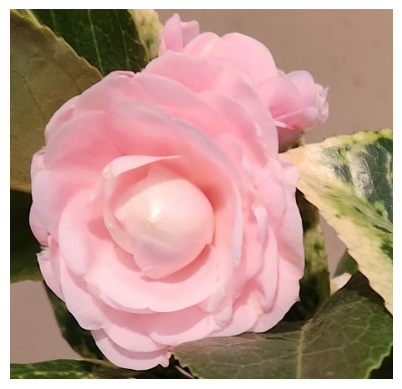

(443, 458, 3)

In [27]:
import matplotlib.image as mpimg
img = mpimg.imread('data/camellia.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()
img.shape

In [28]:
from numpy.linalg import svd
def svd_img(img, r = None):
    """
    Parameters:
        img: numpy array
            RGB 3차원 픽셀 데이터
        r: int
            특이값 분해(SVD) rank, None: full SVD
    Returns:
        특이 행렬들을 통한 이미지 복원 데이터, 원본 데이터와의 SSE(sum of squared error)
    """
    
    img2 = []
    if r is None:
        # Full SVD
        for j in range(3):
            U, Sigma_, VT = svd(img[:, :, j])
            Sigma = np.zeros_like(img[:, :, 0], dtype='float')
            for i in range(len(Sigma_)):
                Sigma[i,i] = Sigma_[i]
            img2.append(np.dot(np.dot(U, Sigma), VT))
    else:
        if r <= 0:
            r = min(img.shape[:2]) # thin SVD
        for j in range(3):
            U, Sigma, VT = svd(img[:, :, j], full_matrices=False)
            U =  U[:, :r]
            VT = VT[:r]
            img2.append(np.dot(U * Sigma[:r], VT))
    img2 = np.stack(img2, axis=-1).clip(0, 255)
    sse = np.sum(np.square(img - img2))
    return np.round(img2).astype(int), sse

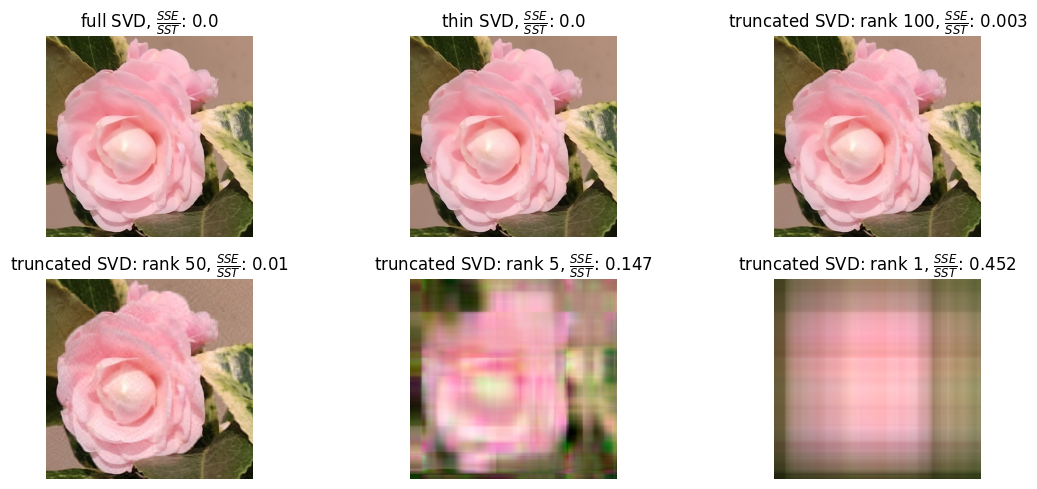

In [29]:
profiles = [
    ('full SVD', None), 
    ('thin SVD', 0), 
    ('truncated SVD: rank 100', 100), 
    ('truncated SVD: rank 50', 50), 
    ('truncated SVD: rank 5', 5), 
    ('truncated SVD: rank 1', 1)
]
fig, axes = plt.subplots(2, 3, figsize = (12, 5))
sst = np.sum(np.square(img - np.mean(img)))
for profile, ax in zip(profiles, axes.ravel()):
    img2, sse = svd_img(img, profile[1])
    ax.imshow(img2)
    ax.set_title('{}, {}: {}'.format(profile[0], "$\\frac{SSE}{SST}$", np.round(sse / sst, 3)))
    ax.axis('off')
plt.tight_layout()
plt.show()

### 4. 다차원 척도법
#### 다차원 척도법(Multi-Dimensional Scaling, MDS): 데이터 포인트 간의 유사도 또는 거리를 유지하면서 차원 축소
- 고전적 다차원 척도법(Classical Multi-Dimensional Scaling): 데이터 포인트 간의 유클리드 거리를 유지하는 방향으로 차원 축소

$X_c = X - \bar{X}$ $X$를 중심 평균화

$X$의 다차원 척도값은 $X_c$의 특이값 분해를 통해 도출

$X_c = U\Sigma V^T$

$\Sigma$를 기준으로 차원 축소

$U\Sigma = X_c V$

$X_c X_c^T$ 고유값 분해를 통해 구할 수 있음

$X_c X_c^T = U\Lambda U^T$ $\Rightarrow$ 또한 $X$의 PCA 변환값과 동치

#### 고전적 다차원 척도법 의미

$X = \begin{bmatrix}
x_{11} & \cdots & x_{1m} \\
\vdots & \ddots & \vdots \\
x_{n1} & \cdots & x_{nm}
\end{bmatrix}$

$B = XX^T = \begin{bmatrix}
b_{11}^2 & \cdots & b_{1n}^2 \\
\vdots & \ddots & \vdots \\
b_{n1}^2 & \cdots & b_{nn}^2
\end{bmatrix}$

$\mathbf{x}_i = [x_{i1} \quad \cdots \quad x_{im}]$

$d_{ij}^2 = B_{ii} + B_{jj} - 2B_{ij}$

유클리드거리의 제곱

$D^2 = diag(B)\mathbf{1}^T + \mathbf{1}diag(B)^T - 2B$

중심화행렬

$d_{ij}^2 = (\mathbf{x}_i - \mathbf{x}_j)(\mathbf{x}_i - \mathbf{x}_j)^T$

$= \mathbf{x}_i \mathbf{x}_i^T + \mathbf{x}_j \mathbf{x}_j^T - 2\mathbf{x}_i \mathbf{x}_j^T$

$H = I - \frac{1}{n}\mathbf{1}\mathbf{1}^T$

$D^2 = \begin{bmatrix}
d_{11}^2 & \cdots & d_{1n}^2 \\
\vdots & \ddots & \vdots \\
d_{n1}^2 & \cdots & d_{nn}^2
\end{bmatrix}$

$HD^2H = H(diag(B)\mathbf{1}^T + diag(B)^T\mathbf{1} - 2B)H$

$HD^2H = -2HBH$

$HBH = -\frac{HD^2H}{2}$

$X_c = X - \bar{X}$: $X$를 중심 평균화

$HBH = HXX^TH = X_c X_c^T$

$X_c X_c^T = -\frac{HD^2H}{2}$ $\Rightarrow$ 유클리디언거리로된 거리행렬만 주어졌을 때 활용

#### Metric MDS and Non-Metric MDS

- Stress 함수를 최소화하는 저차원의 값 찾기

|  | Metric MDS | Non-metric MDS |
|---|---|---|
| 거리 | • Metric 거리 | • 유사도 관계 |
| Stress 함수 | $\sqrt{\sum_{i<j}(d_{ij}-\delta_{ij})^2}$<br><br>$d_{ij}$: 원래 데이터 포인트 $i, j$의 거리<br><br>$\delta_{ij}$: 축소된 차원의 데이터 포인트 $i, j$ 의 거리 | $\sqrt{\sum_{i<j}(f(d_{ij})-\delta_{ij})^2}$<br><br>$d_{ij}$: 원래 데이터 포인트의 거리 순위<br><br>$\delta_{ij}$: 축소된 차원의 데이터 포인트 $i, j$의 거리 순위<br><br>$f(x)$: 단조 증가 함수 |
| 특징 | • 크기 정보(비율, 간격) 자체가 의미 있음<br>• 거리 값이 연속적이고 수치적 의미가 있는 경우에 적합 | • 입력 거리의 순위 정보만 중요<br>• 심리학, 사회학 등 주관적 유사도 기반 분석에 유용 |

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

sklearn.datas.load_digits을 통해 sklearn에 내장되어 있는 숫자 필기 데이터를 불러 옵니다.

고전적 다차원 척도법의 결과를 시각화해 봅니다.

</div>

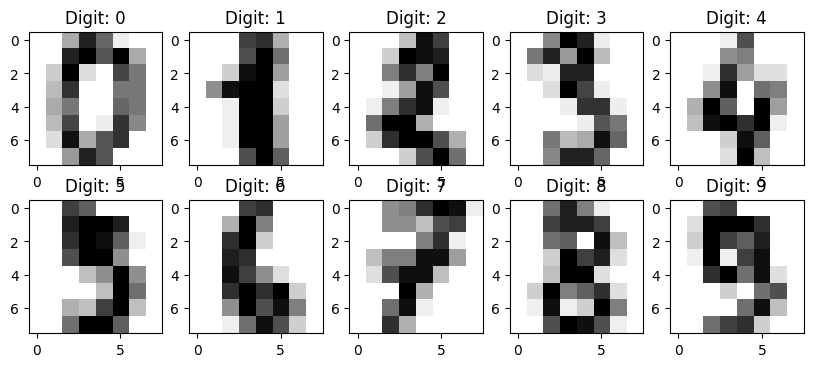

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits['images'].reshape(-1, 64)
y_digits = digits['target']

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
# 10개의 데이터만 시각화해봅니다.
for i, ax in zip(range(10), axes.ravel()): 
    ax.imshow(X_digits[i].reshape([8, 8]), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit: %i' % y_digits[i])
plt.show()

In [31]:
from scipy.spatial.distance import pdist, squareform
n = X_digits.shape[0]
D2 = squareform(pdist(X_digits) ** 2)
C = np.eye(n) - np.ones_like(D2) / n
B = -0.5 * np.matmul(np.matmul(C, D2), C)
eigenval, eigenvec = np.linalg.eigh(B) # eigh는 대칭행렬의 고윳값 분해에 효과적입니다.

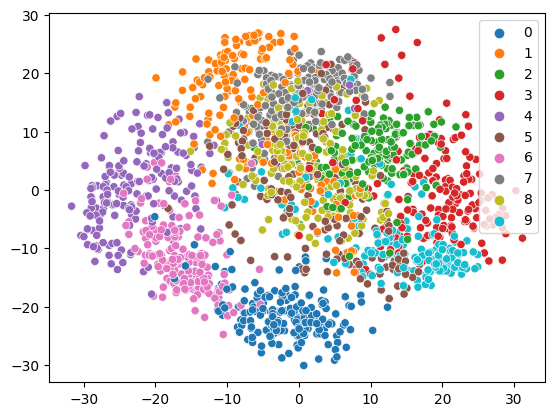

In [32]:
k = 2
idx = np.argsort(-eigenval)[:k] # 고윳값 역순으로 나오지 않아 고윳값이 큰 순으로 k개의 위치 인덱스를 선택합니다.
Lambda_05 = eigenval[idx] ** 0.5
Qm = eigenvec[:, idx]
X_mds = Lambda_05 * Qm

sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y_digits.astype('str'))

plt.show()

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 9]의 digit 데이터를 metric 방법과 Non-metric 방법으로 했을 때 결과를 시각화하여 비교합니다.

</div>

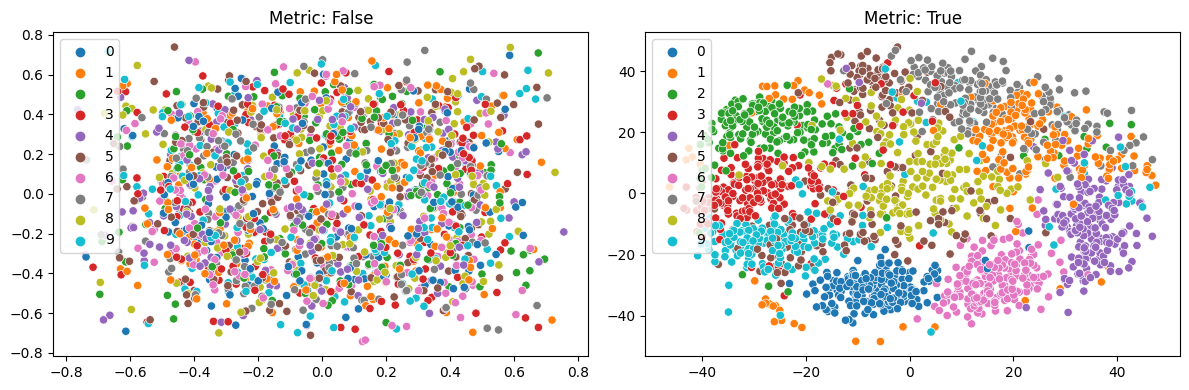

In [33]:
from sklearn.manifold import MDS

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for metric, ax in zip([False, True], axes.ravel()):
    mds = MDS(n_components=2, metric=metric)
    X_mds = mds.fit_transform(X_digits)
    sns.scatterplot(x = X_mds[:, 0], y = X_mds[:, 1], hue=y_digits.astype('str'), ax=ax)
    ax.set_title("Metric: {}".format(metric))
plt.tight_layout()
plt.show()

### 5. t-확률적 이웃 임베딩

#### t-확률적 이웃 임베딩(t-Distributed Stochastic Neighbor Embedding): 국소적인 구조를 보존하며 2, 3 차원으로 축소

- 차원 축소 과정

$p_{ij}$: 원래 공간에서 데이터 포인트 $i, j$가 이웃일 확률
: 가우시안 분포를 기반으로 계산

$p_{j|i} = \frac{\exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_k\|^2}{2\sigma_i^2}\right)}$

$\sigma_i^2$: perplexity값을 기준으로 $i$ 데이터 포인트마다 이진 탐색을 통해 자동 산출

$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$

$q_{ij}$: 측소 공간에서 데이터 포인트 i, j 점에서 j점을 선택할 확률
- 자유도가 1인 Student-t분포를 기반으로 계산: 양쪽 꼬리가 두터워 멀리 있는 점까지 구분 효과

$q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq i}(1 + ||y_k - y_i||^2)^{-1}}$

**t-분포 확률 밀도 함수**

$f_v(t) = \frac{\Gamma(\frac{v+1}{2})}{\sqrt{v\pi}\Gamma(\frac{v}{2})}(1 + \frac{t^2}{v})^{-\frac{v+1}{2}}$

- 손실 함수: Kullback Leibler Divergence

$KL(P||Q) = \sum_{i \neq j} p_{ij} \log\left(\frac{p_{ij}}{q_{ij}}\right)$

$L = \sum_{i \neq j} p_{ij} \log(p_{ij}) - \sum_{i \neq j} p_{ij} \log(q_{ij})$

$\frac{\partial L}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij})(y_i - y_j)(1 + ||y_i - y_j||^2)^{-1}$

**→ 경사하강법으로 값 도출**

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 9]의 digit 데이터를 TSNE로 perflexity를 5, 10, 20, 25 로 설정하면서 2차원으로 축소시킨 결과를 비교합니다.
</div>

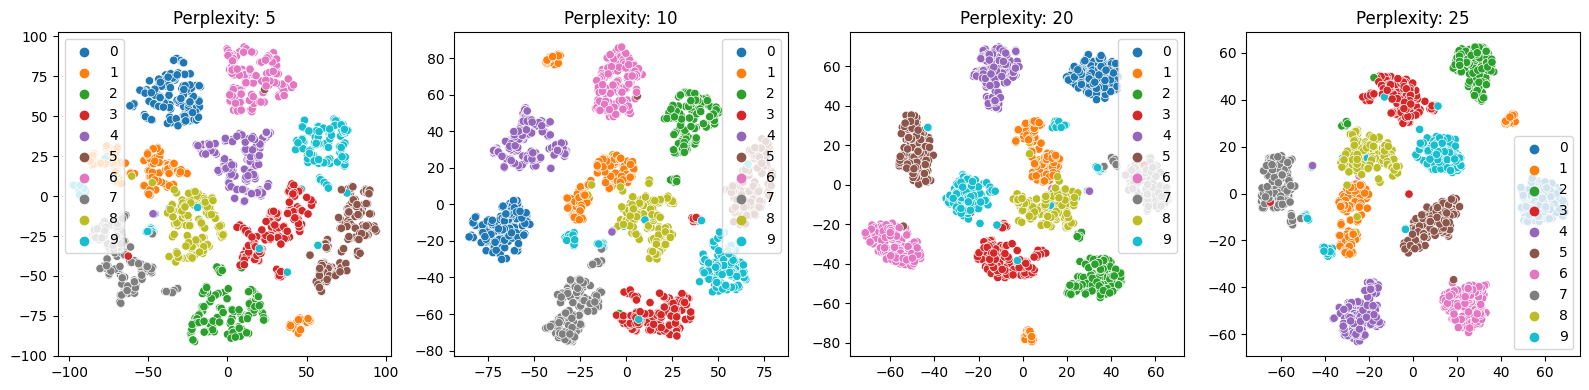

In [34]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for perplexity, ax in zip([5, 10, 20, 25], axes.ravel()):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_digits)
    sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=y_digits.astype('str'), ax=ax)
    ax.set_title("Perplexity: {}".format(perplexity))
plt.tight_layout()
plt.show()

#### 장점
- 복잡한 데이터 구조를 시각적으로 명확하게 구분하게 함
- 클러스터 구조가 잘 드러남
- 비선형 구조를 잘 잡아냄
#### 단점
- 계산 비용이 높음
- 하이퍼 파라미터에 민감
- 재현성 낮음(초기값에 따라 결과가 달라짐)

### 6. 선형판별분석
#### 선형판별분석(Linear Discriminant Analysis): 클래스 간 분리도를 최대로 유지한 차원 축소
- 클래스 간의 분산은 최대화
> $𝑆_𝐵=\sum{𝑘=1}^𝐾𝑁_𝑘(\mu_𝐤−\mu)(\mu_𝐤−\mu)^𝑇$
> 
> $K$: 클래스의 수
> 
> $\mu_k$: k 클래스의 데이터 포인트의 평균점
> 
> $\mu$: 데이터 포인트의 평균점

- 클래스 내부의 분산은 최소화
> $𝑆_W=\sum_{𝑘=1}^𝐾\sum_{𝐱∈𝐶_𝑘}(𝐱−\mu_𝐊)(𝒙−𝛍_𝐤)^𝑇$
> 
> Ck=\{𝐱|𝐱는 k군집의 데이터 포인트\}

#### 변환 유도 과정

- Fisher Criterion
> $𝐽(\mathbf{𝐰})=\frac{\mathbf{𝐰}^𝐓𝐒_𝐵\mathbf{𝐰}}{\mathbf{𝐰}^𝐓𝐒_𝑊\mathbf{𝐰}}$
>
> $\mathbf{w}$: 투영 벡터(선형 판별 벡터)
- 일반화된 고윳값 문제로 도출
> $\mathbf{𝑆}_𝐵\mathbf{𝑊}=\mathbf{𝑆}_𝑊\mathbf{𝑊}\mathbf{\Lambda}$
>
> $\mathbf{𝑆}_𝑊^{-1}\mathbf{𝑆}_𝐵\mathbf{𝑊}=\mathbf{𝑊}\mathbf{\Lambda}$
>
> $min(k-1, \text{W 의 차원})$ 개의 선형 판별 벡터 도출 가능

**[Ex. 9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex. 9]의 digit 데이터를 선형판별분석을 통해 성분을 구하고 분산 설명율이 가장 큰 성분 2개를 선택하여
   
클래스별 분포를 시각화해봅니다.

</div>

In [35]:
# S는 대칭행렬이 아닙니다. 따라서, eigh가 아닌 eig를 사용합니다. 
from numpy.linalg import eig

df_digit = pd.DataFrame(X_digits)
df_digit = df_digit.loc[:, (df_digit != 0).any(axis=0)]
m = df_digit.mean(axis=0)
C = np.unique(y_digits).size
# 클래스로 그룹화하여 평균을 구하고, 클래스별 공분산을 구합니다.
Sigma_b = df_digit.groupby(y_digits).mean().pipe(lambda x: x - m).pipe(lambda x: x.T.dot(x)) / C
# 클래스 내의 공분산을 각 클래스에서 공분산의 평균으로 구합니다.
Sigma = df_digit.groupby(y_digits).transform(lambda x: x - x.mean()).cov()

S = np.matmul(np.linalg.inv(Sigma), Sigma_b)
Lambda, Q = eig(S)

In [36]:
explained_variance_ratio = Lambda[:C].real / Lambda[:C].real.sum()
Q = Q[:, :C].real
explained_variance_ratio

array([2.88187700e-01, 1.83248668e-01, 1.70008893e-01, 1.16136754e-01,
       8.38399596e-02, 6.54017075e-02, 4.28676742e-02, 2.92935012e-02,
       2.10151424e-02, 1.40556100e-16])

In [37]:
X_lda = df_digit.dot(Q[:, :9].real)
X_lda

,0,1,2,3,4,5,6,7,8
0,-0.227653,1.784011,0.066362,-0.865768,-0.278685,-0.359277,-0.035692,0.136615,1.119912
1,0.358088,-1.705822,-1.166205,0.100324,-1.136348,0.980544,-0.025259,-1.577681,-0.116223
2,0.868894,-1.337614,-2.178652,-0.661354,0.184396,0.468774,-0.728469,0.756903,0.529782
3,0.975783,-0.114924,-0.141675,0.615213,-0.440138,-0.427787,0.719838,-0.599925,0.608651
4,-1.162669,-1.049336,-0.329099,-0.366476,-0.532257,0.151855,0.288876,0.567722,0.637063
...,...,...,...,...,...,...,...,...,...
1792,0.583695,0.571385,0.905697,-0.464262,-1.444914,-0.058597,-0.173030,1.251752,-0.023383
1793,-0.332656,1.327030,-0.349560,-0.327237,0.286159,0.000346,-0.236578,-0.534700,0.829014
1794,0.039772,-0.903351,-1.574418,-0.066595,-1.463605,-1.021976,-0.466437,1.247023,1.765824
1795,0.386739,0.403940,0.118378,-0.634216,-1.242425,-0.129434,-0.291769,0.467365,-0.285099


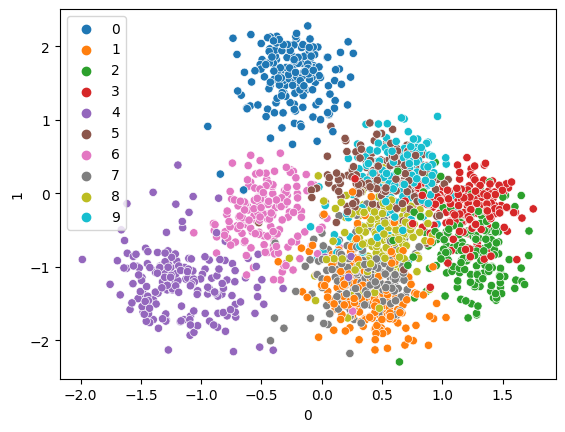

In [38]:
sns.scatterplot(x=X_lda[0], y= X_lda[1], hue=y_digits.astype('str'))
plt.show()

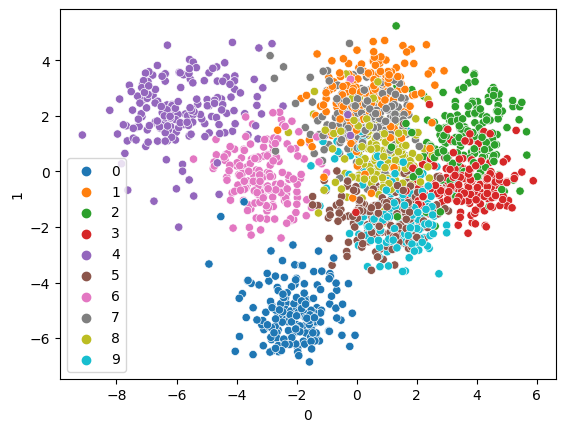

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = pd.DataFrame(lda.fit_transform(df_digit, y_digits))

sns.scatterplot(x=X_lda[0], y= X_lda[1], hue=y_digits.astype('str'))
plt.show()

### 7. 부분 최소 제곱 회귀

#### 부분 최소 제곱 회귀(Partial Least Squares Regression, PLS)
- 수치형 입력 변수 X 에서 Y 를 예측력을 최대한 유지하는 선형 변환을 유도하여 축소

$X \in R^{n \times m}$ $Y \in R^{n \times p}$

$X = TP^T + E$

$Y = UQ^T + F$

**→ $T, U$의 공분산 행렬을 최대화**

$l$: PLS의 성분수

$T, U \in R^{n \times l}$ $T$: X의 score, 성분 행렬 $U$: Y의 score

$P \in R^{m \times l}, Q \in R^{p \times l}$ $P, Q$: loading 행렬

$E \in R^{n \times m}, F \in R^{n \times m}$ $E, F$: 잔차 행렬

#### PLS2: 다변량(𝑝≥2)회귀 문제 성분 추정
$X = TP^T + E$

$Y = UQ^T + F$

$\Rightarrow$ X, Y 의 공분산을 최대화 하는 방향의 w, c 를 찾기 위해, X $t=\mathbf{X}\mathbf{p}$에서 와 $u=\mathbf{Y}\mathbf{q}$를 추출
1. 중심 평균화

$\mathbf{𝑋}_𝑐=\mathbf{𝑋}−\bar{\mathbf{𝑋}}$

$\mathbf{Y}_𝑐=\mathbf{Y}−\bar{\mathbf{Y}}$


2. 성분 추출

$u$: Y의 첫 번째 주성분으로 초기화 $\mathbf{u} \in R^n$ $\mathbf{w} \in R^m$ $\mathbf{c} \in R^p$

$Cov(X_c\mathbf{w}, \mathbf{u}) = \frac{X_c\mathbf{w}\mathbf{u}}{n}$ $||\mathbf{w}|| = 1$에서, $(X_c\mathbf{w}\mathbf{u})^2$를 최대화

$\mathbf{w} = \frac{X_c^T\mathbf{u}}{||X_c^T\mathbf{u}||_2}$ ---(1)
> 증명
> 
> $max_{||w||_2=1}\mathbf{𝑋}_𝑐\mathbf{𝐰}\mathbf{𝐮}$
> 
> $\mathbf{𝑋}_𝑐\mathbf{𝐰}\mathbf{𝐮} = \mathbf{𝐰}^T\mathbf{𝑋}_𝑐^T\mathbf{𝐮}$
> 
> $\mathbf{w}$의 l2-norm이 1로 제약이 걸려 있는 상황에서 위 식이 최대가 되려면, $\mathbf{w}$는 $\mathbf{X}_c^T\mathbf{u}$와 평행한 벡터
> 
> $\mathbf{w}=\alpha\mathbf{X}_c^T\mathbf{u}$, $||w||_2=1$이려면, $\alpha = ||\mathbf{X}_c^T\mathbf{u}||_2$

$\mathbf{c} = \frac{Y_c^T\mathbf{t}}{\mathbf{t}^T\mathbf{t}}$ **→ Y를 t로 예측하는 회귀 계수**

$\mathbf{u} = Y_c\mathbf{c}$

**수렴할 때까지 (1)부터 반복**

3. p, q 도출

$X_c = TP^T + E$

$Y_c = UQ^T + F$ $U \approx T$

$\mathbf{p} = \frac{X_c^T\mathbf{t}}{\mathbf{t}^T\mathbf{t}}$ $\Leftarrow$ t 벡터로 X를 예측하는 정규방정식의 해

$\mathbf{q} = \frac{Y_c^T\mathbf{t}}{\mathbf{t}^T\mathbf{t}}$ $\Leftarrow$ t 벡터로 Y를 예측하는 정규방정식의 해

4. 𝑋, 𝑌 에서 성분에 의해 설명되는 양 제거(Deflation)
$X \leftarrow X - \mathbf{t}\mathbf{p}^t$

$Y \leftarrow Y - \mathbf{t}\mathbf{q}^t$

**지정한 성분 수가 뽑힐 때까지 2단계부터 반복**

$W$: 각 단계 w로 구성된 행렬

$P$: 각 단계 p로 구성된 행렬

$Q$: 각 단계 q로 구성된 행렬

$B = W(P^TW)^{-1}Q^T$

$\hat{Y}_c = X_c\hat{B}$

**Ŷ의 유도**

> $\hat{Y} = TQ^T$ $X_c = TP^T$ $X_c \approx \hat{X}_c$
> 
> $X_c \approx TP^T$ $X_cW \approx TP^TW$

> $T \approx X_cW(P^TW)^{-1}$

#### PLS1: 단일변량(𝑝=1) PLS2 에서 step2 변경
- $Cov(X\mathbf{w}, y)^2$을 최대화하는 단위벡터 $\mathbf{𝐰}$를 도출
> $\mathbf{w} = \frac{X_c^T\mathbf{u}}{||X_c^T\mathbf{u}||_2}$
> 
> $t=\mathbf{X}_cw$

**[Ex.10]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone셋을 80%는 df_train으로 20%는 df_test로 분리하고, df_train의 통계량으로 df_train과 df_test를 표준 정규화합니다.

Rings를 대상 변수로 하고, PLS 성분을 추가해감에 따라 Rings의 MSE 추이를 봅니다.

</div>

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_abalone, train_size=0.8, random_state=123)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import zscore
X_cols = [i for i in df_abalone.columns if i not in['Sex', 'Rings']]

# 표준화는 평균 중심화를 포함합니다.
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(df_train[X_cols])
X_test_std = std_scaler.transform(df_test[X_cols])

# 대상 변수를 표준화 합니다.
y = zscore(df_train['Rings'])

t_vals, w_vals, beta_vals, = list(), list(), list()
thres = 1e-3
while True:
    # 대상변수와 공분산을 최대화 시키는 변화은  X_std^T y 입니다. 
    w = np.dot(X_train_std.T, y)
    # norm으로 벡터 w를 정규화합니다.
    w = w / (np.sum(np.square(w)) ** 0.5)
    t = np.dot(X_train_std, w)
    # 변수 t를 사용하여 y를 예측하는 선형회귀 계수를 구합니다.
    beta = 1 / np.dot(t.T, t) * np.dot(t.T, y) 
    y_hat = beta * t  
    # 종료 조건 체크
    if r2_score(y, y_hat) < thres:
        break
    t_vals.append(t)
    w_vals.append(w)
    beta_vals.append(beta)
    # t를 사용하여 y를 예측하는 회귀모델을 사용하여 설명만큼(y_hat)을 y에서 뺍니다.
    y = y - y_hat

# 단계에서 도출된 t를 모아 디자인 행렬을 만듭니다.
X_train_t = np.vstack(t_vals).T
# 학습데이터로 얻어진 선형변환을 사용하여 평가 데이터를 바꿉니다.
X_test_t = np.dot(X_test_std, np.vstack(w_vals).T)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg_lr = LinearRegression()
mse_train = []
mse_test = []
for i in range(1, (len(t_vals))):
    reg_lr.fit(X_train_t[:, :i], df_train['Rings'])
    mse_train.append(
        mean_squared_error(df_train['Rings'], reg_lr.predict(X_train_t[:, :i]))
    )
    mse_test.append(
        mean_squared_error(df_test['Rings'], reg_lr.predict(X_test_t[:, :i]))
    )

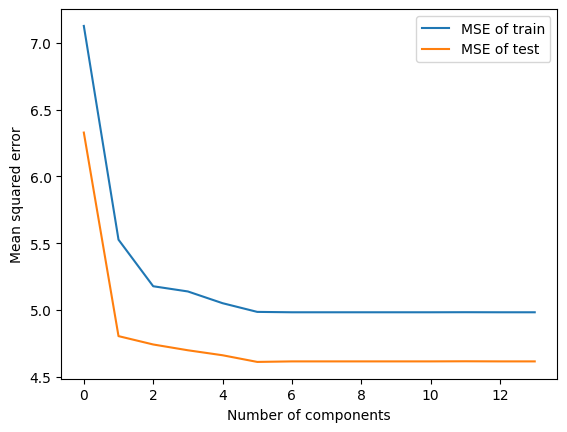

In [10]:
plt.plot(mse_train, label='MSE of train')
plt.plot(mse_test, label='MSE of test')
plt.xlabel('Number of components')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

### 8. 정리

|   | 보존 구조 | 장점 | 단점 |
| --- | --- | --- | --- |
| 주성분 분석<br/>(PCA) | 전체 분산 | 빠른 속도와 선형 구조 보존<br/>노이즈 제거 효과<br/>해석 가능 | 비선형 구조 표현 제한적 |
| 특이값 분해<br/>(SVD) | 행렬의 저차원 근사화 | PCA 일반화를 통한 모든 행렬 적용 가능<br/>잠재 요소 추출 특화 | 노이즈 민감 |
| 선형 판별 분석<br/>(LDA) | 클래스 간 분산<br/>클래스 내 분산 비율 | 클래스 분리 최대화 | 표현의 제한(클래스 수 – 1 차원) |
| t-SNE | 지역 구조 | 고차원 데이터 시각화 특화<br/>비선형 구조 반영 | 전체 구조 보존 불가능<br/>결과 불안정<br/>높은 계산 비용 |
| 다차원 척도법<br/>(MDS) | 거리 행렬(유사도) | 거리 기반 구조 재현<br/>Non-metric 즉 대소 관계로 수행 가능 | 고전적: 선형 구조만 반영<br/>Metric: 높은 계산 비용, 높은 수치 해석 난이도<br/>Non-metric: 순서 정보 사용으로 인한 기존 수치 의미 손실 |
| 부분 최소 제곱법<br/>(PLS) | X 와 Y 간의 공분산 | 다중 공선성의 대응책 | 높은 해석 난이도 |
